<a href="https://colab.research.google.com/github/burhanclkkl/data-preprocessing/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Kalp Krizi Analizi ve Tahmin Veri Kümesi**

* Age : Hastanın Yaşı
* Sex : Hastanın Cinsiyeti
* exang: Egzersize bağlı anjina (1 = evet; 0 = hayır)(Kalbi besleyen atardamarların darlık, tıkanma gibi sebeplerle kalbin oksijen ihtiyacını karşılayamadığı durumlarda kalp kökenli göğüs ağrısı veya sıkıntı hissi )
* ca: büyük kanalların sayısı (0-3)
* cp : Chest Pain type chest pain type
    * Value 1: tipik angina
    * Value 2: atipik angina
    * Value 3: orijinal olmayan ağrı
    * Value 4: asymptomatic
* trtbps : Dinlenme Kan Basıncı (in mm Hg)
* chol : MI sensörü aracılığıyla getirilen mg/dl cinsinden kolestoral
* fbs : (Açlık Kan Şekeri > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : dinlenme elektrokardiyografi sonuçları
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : Ulaşılan max kalp atış hızı
* target : 0= daha az kalp krizi olasılığı 1=daha fazla kalp krizi olasılığı

    
Dataya ulaşmak için [tıklayınız](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data).


In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
# algebra
import numpy as np

# dataframes
import pandas as pd

# EDA & visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# log
import math

# spliting and optimizing models
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

# linear model
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
    Lasso,
    Ridge,
    ElasticNet,
)

# Trees
from sklearn.tree import plot_tree, DecisionTreeClassifier, ExtraTreeClassifier


# Ensembles
from sklearn.ensemble import (
    RandomForestClassifier,
    VotingClassifier,
)

# SVMs
from sklearn.svm import SVC

# Feature preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Model scoring
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
    confusion_matrix,
    classification_report,
)
import warnings

# model pipelining
from sklearn.pipeline import Pipeline

# Selection
from sklearn.feature_selection import (
    chi2,
    VarianceThreshold,
    f_classif,
    SelectKBest,
    SelectPercentile,
    SequentialFeatureSelector,
)

pd.options.display.max_columns = None
warnings.filterwarnings('ignore')

In [167]:
data = pd.read_csv("heart.csv") #data okuma işlemi
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1.0,1
1,37.0,1.0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2.0,1
2,41.0,0.0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2.0,1
3,56.0,1.0,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2.0,1
4,57.0,0.0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,57.0,0.0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3.0,0
312,45.0,1.0,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3.0,0
313,68.0,1.0,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3.0,0
314,57.0,1.0,0,130.0,131.0,0,1,115.0,1,1.2,1,1,3.0,0


In [168]:
data.head() #datanın ilk 5 verisi

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1.0,1
1,37.0,1.0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2.0,1
2,41.0,0.0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2.0,1
3,56.0,1.0,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2.0,1
4,57.0,0.0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2.0,1


In [169]:
data.tail() #datanın son 5 verisi

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
311,57.0,0.0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3.0,0
312,45.0,1.0,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3.0,0
313,68.0,1.0,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3.0,0
314,57.0,1.0,0,130.0,131.0,0,1,115.0,1,1.2,1,1,3.0,0
315,57.0,0.0,1,130.0,236.0,0,0,174.0,0,0.0,1,1,2.0,0


In [170]:
data.describe() # Sütunların istatiksel özeti

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,314.000000,315.000000,316.000000,315.000000,315.000000,316.000000,316.000000,314.000000,316.000000,315.000000,316.000000,316.000000,315.000000,316.000000
mean,57.343949,0.730159,0.927215,143.269841,248.209524,0.142405,0.547468,148.531847,0.427215,1.152381,1.386076,0.740506,2.339683,0.560127
std,21.417414,0.517415,1.028678,89.610730,63.735924,0.350019,0.523383,23.373627,0.688513,1.531709,0.609186,1.002729,0.614719,0.534099
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,62.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,165.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,250.000000,2.000000,3.000000,950.000000,564.000000,1.000000,2.000000,202.000000,3.000000,11.200000,2.000000,4.000000,3.000000,3.000000


In [171]:
data.shape #datanın satır ve sütun sayısı

(316, 14)

In [172]:
data.columns #datanın sütunları ve veri tipleri

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

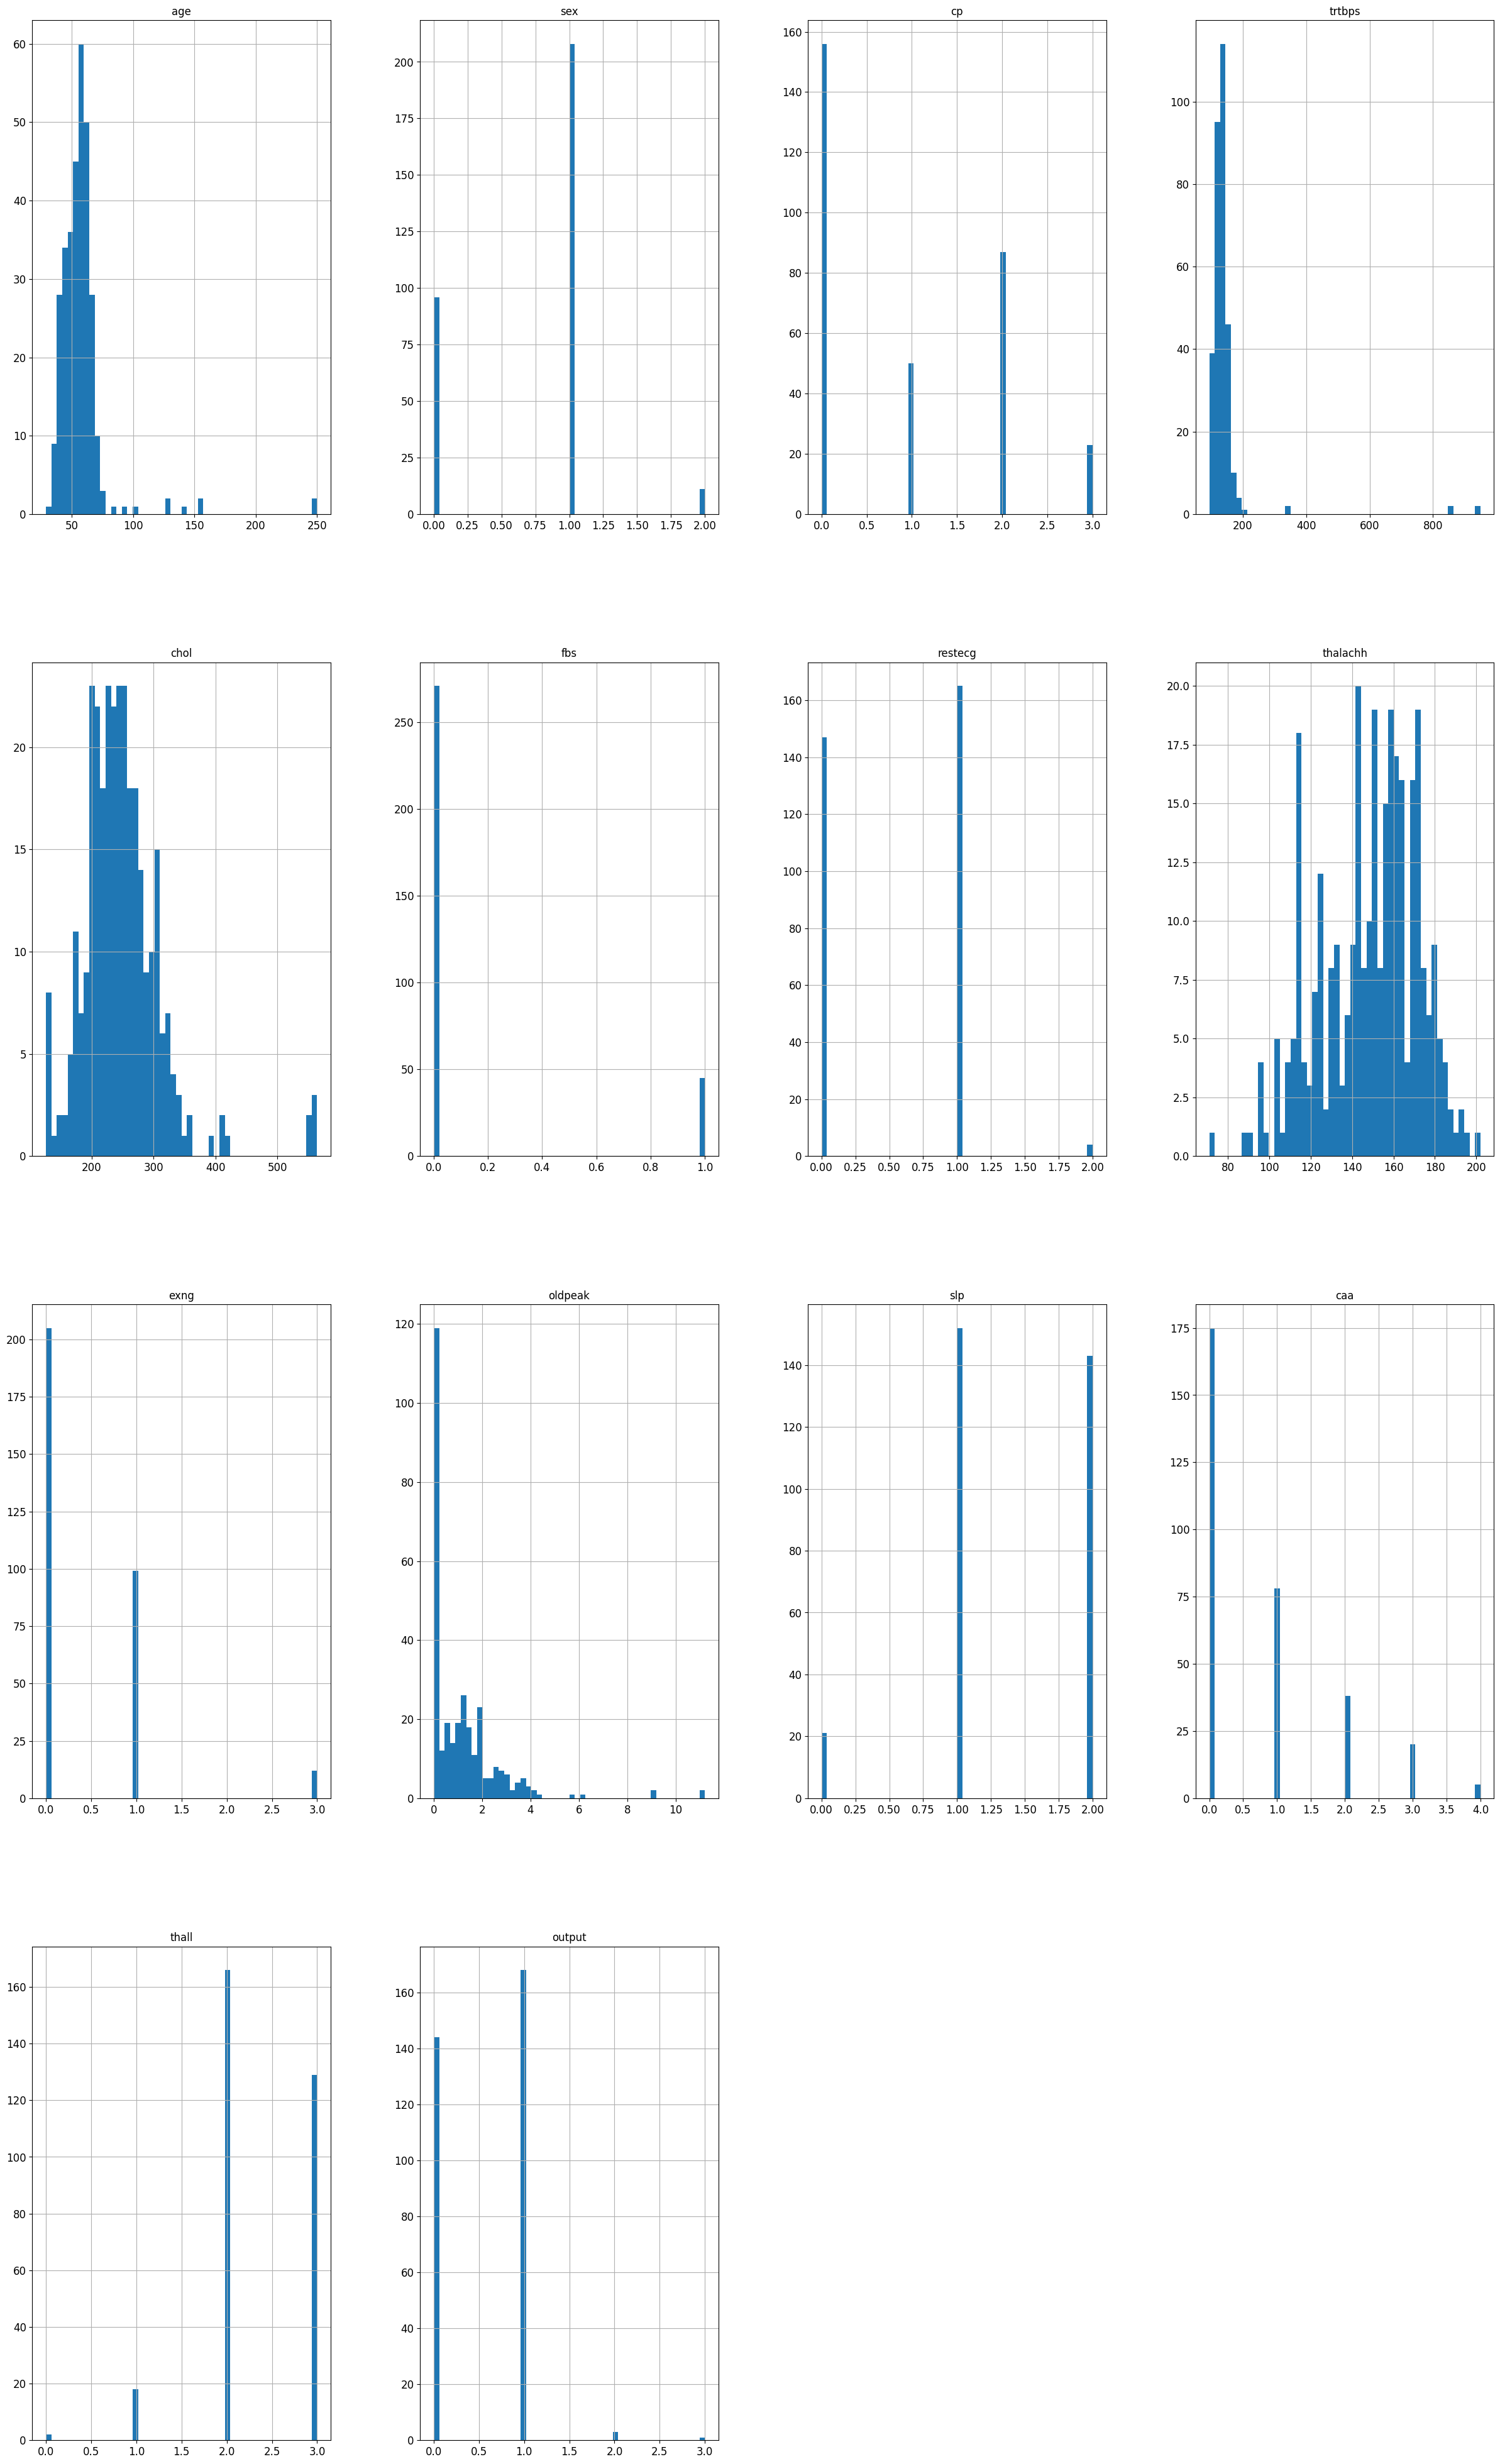

In [173]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.hist(figsize=(30, 50), bins=50, xlabelsize=12, ylabelsize=12); #sayısal stünların dağılımı histogram grafik bins:Kullanılacak histogram kutusu sayısı

In [174]:
data=data.rename(columns={"age":"yas", "sex": "cinsiyet", "output":"kanser_durumu"}) #yeniden isimlendirme

In [175]:
data

,yas,cinsiyet,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,kanser_durumu
0,63.0,1.0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1.0,1
1,37.0,1.0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2.0,1
2,41.0,0.0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2.0,1
3,56.0,1.0,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2.0,1
4,57.0,0.0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,57.0,0.0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3.0,0
312,45.0,1.0,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3.0,0
313,68.0,1.0,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3.0,0
314,57.0,1.0,0,130.0,131.0,0,1,115.0,1,1.2,1,1,3.0,0


In [176]:
data.info() #data hakkında

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yas            314 non-null    float64
 1   cinsiyet       315 non-null    float64
 2   cp             316 non-null    int64  
 3   trtbps         315 non-null    float64
 4   chol           315 non-null    float64
 5   fbs            316 non-null    int64  
 6   restecg        316 non-null    int64  
 7   thalachh       314 non-null    float64
 8   exng           316 non-null    int64  
 9   oldpeak        315 non-null    float64
 10  slp            316 non-null    int64  
 11  caa            316 non-null    int64  
 12  thall          315 non-null    float64
 13  kanser_durumu  316 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 34.7 KB


In [177]:
data.isna() #eksik verileri yazdırma

,yas,cinsiyet,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,kanser_durumu
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,False,False,False,False,False,False,False,False,False,False,False,False,False,False
312,False,False,False,False,False,False,False,False,False,False,False,False,False,False
313,False,False,False,False,False,False,False,False,False,False,False,False,False,False
314,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [178]:
data.isnull().sum() #datanın eksik değerlerinin sayısı

yas              2
cinsiyet         1
cp               0
trtbps           1
chol             1
fbs              0
restecg          0
thalachh         2
exng             0
oldpeak          1
slp              0
caa              0
thall            1
kanser_durumu    0
dtype: int64

In [179]:
data.notnull().sum() #datanın eksik olmayan değerlerinin sayısı

yas              314
cinsiyet         315
cp               316
trtbps           315
chol             315
fbs              316
restecg          316
thalachh         314
exng             316
oldpeak          315
slp              316
caa              316
thall            315
kanser_durumu    316
dtype: int64

In [180]:
data[data.isnull().any(axis=1)] #eksik veriler

,yas,cinsiyet,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,kanser_durumu
297,NaN,2.0,0,160.0,250.0,0,1,115.0,3,11.2,1,1,3.0,1
298,95.0,2.0,0,NaN,131.0,0,1,115.0,3,1.2,1,1,3.0,1
299,35.0,NaN,0,350.0,131.0,0,1,115.0,3,9.0,1,1,3.0,0
300,85.0,2.0,0,850.0,555.0,0,1,NaN,3,1.2,1,1,3.0,0
301,55.0,0.0,0,128.0,205.0,0,2,NaN,1,NaN,1,1,3.0,0
302,61.0,1.0,0,148.0,NaN,0,1,161.0,0,0.0,2,1,3.0,0
303,61.0,1.0,0,148.0,255.0,0,1,161.0,0,0.0,2,1,NaN,0
304,NaN,1.0,0,114.0,318.0,0,2,140.0,0,4.4,0,3,1.0,0


In [181]:
data[data.notnull().all(axis=1)] #eksik olmayan veriler

,yas,cinsiyet,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,kanser_durumu
0,63.0,1.0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1.0,1
1,37.0,1.0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2.0,1
2,41.0,0.0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2.0,1
3,56.0,1.0,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2.0,1
4,57.0,0.0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,57.0,0.0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3.0,0
312,45.0,1.0,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3.0,0
313,68.0,1.0,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3.0,0
314,57.0,1.0,0,130.0,131.0,0,1,115.0,1,1.2,1,1,3.0,0


In [182]:
data.dropna() #eksk verileri düşürme işlemi

,yas,cinsiyet,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,kanser_durumu
0,63.0,1.0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1.0,1
1,37.0,1.0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2.0,1
2,41.0,0.0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2.0,1
3,56.0,1.0,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2.0,1
4,57.0,0.0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,57.0,0.0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3.0,0
312,45.0,1.0,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3.0,0
313,68.0,1.0,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3.0,0
314,57.0,1.0,0,130.0,131.0,0,1,115.0,1,1.2,1,1,3.0,0


In [183]:
data.yas.unique() #benzersiz değerleri döndürür

array([ 63.,  37.,  41.,  56.,  57.,  44.,  52.,  54.,  48.,  49.,  64.,
        58.,  50.,  66.,  43.,  69.,  59.,  42.,  61.,  40.,  71.,  51.,
        65.,  53.,  46.,  45.,  39.,  47.,  62.,  34.,  35.,  29.,  55.,
        60.,  67.,  68.,  74.,  76.,  70.,  38.,  77., 157., 250., 103.,
       128., 130., 140.,  nan,  95.,  85.])

In [184]:
data.yas.value_counts() #hangi değerden kaç tane var

58.0     18
57.0     17
54.0     16
59.0     14
52.0     13
51.0     12
62.0     11
56.0     11
44.0     11
60.0     11
64.0     10
41.0     10
61.0      9
63.0      9
67.0      9
43.0      8
45.0      8
55.0      8
42.0      8
53.0      8
65.0      8
46.0      7
66.0      7
48.0      7
50.0      7
49.0      5
47.0      5
35.0      5
68.0      4
70.0      4
39.0      4
38.0      3
40.0      3
71.0      3
69.0      3
34.0      2
37.0      2
157.0     2
250.0     2
29.0      1
74.0      1
76.0      1
77.0      1
103.0     1
128.0     1
130.0     1
140.0     1
95.0      1
85.0      1
Name: yas, dtype: int64

In [185]:
data_drop = data.dropna() #eksk verileri düşürme işlemi

In [186]:
data_drop #data drop verisi

,yas,cinsiyet,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,kanser_durumu
0,63.0,1.0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1.0,1
1,37.0,1.0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2.0,1
2,41.0,0.0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2.0,1
3,56.0,1.0,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2.0,1
4,57.0,0.0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,57.0,0.0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3.0,0
312,45.0,1.0,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3.0,0
313,68.0,1.0,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3.0,0
314,57.0,1.0,0,130.0,131.0,0,1,115.0,1,1.2,1,1,3.0,0


In [187]:
data_drop["yas"].mean() # data drop'un yas ortalaması

57.188311688311686

In [188]:
data_drop.loc[data_drop["yas"] > 80, "yas"] = int(data_drop.loc[data_drop["yas"] < 80, "yas"].mean()) #data drop verisinde yasşların 80 üstü olduğu değerleri yaşların 80'den az olduğu değelerin yas ortalamasının int değeri ile eşitmlenir

In [189]:
data_drop # data drop

,yas,cinsiyet,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,kanser_durumu
0,63.0,1.0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1.0,1
1,37.0,1.0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2.0,1
2,41.0,0.0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2.0,1
3,56.0,1.0,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2.0,1
4,57.0,0.0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,57.0,0.0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3.0,0
312,45.0,1.0,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3.0,0
313,68.0,1.0,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3.0,0
314,57.0,1.0,0,130.0,131.0,0,1,115.0,1,1.2,1,1,3.0,0


In [190]:
data_drop["yas"].mean() # yeni datanın yaş ortlaması

54.32142857142857

In [191]:
data_drop #data_drop datası

,yas,cinsiyet,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,kanser_durumu
0,63.0,1.0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1.0,1
1,37.0,1.0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2.0,1
2,41.0,0.0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2.0,1
3,56.0,1.0,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2.0,1
4,57.0,0.0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,57.0,0.0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3.0,0
312,45.0,1.0,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3.0,0
313,68.0,1.0,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3.0,0
314,57.0,1.0,0,130.0,131.0,0,1,115.0,1,1.2,1,1,3.0,0


In [192]:
data_drop.to_csv("new_heart.csv") #yeni veri seti oluşturma